In [34]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [3]:
e = nx.read_pajek("egypt_retweets.net")

# sub graph and ego network

In [4]:
len(e)

25178

In [7]:
componet_subgraph = list(nx.connected_component_subgraphs(e))

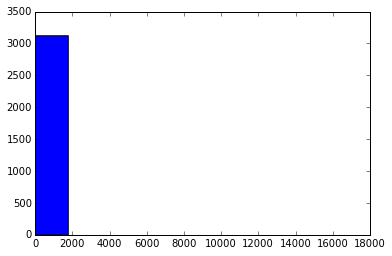

In [16]:
h = plt.hist([len(c) for c in componet_subgraph])

In [84]:
s = pd.DataFrame([len(c) for c in componet_subgraph],columns=['length'])
s.describe()

,length
count,3122.000000
mean,8.064702
std,317.850059
min,1.000000
25%,2.000000
50%,2.000000
75%,2.000000
max,17762.000000


In [75]:
s.groupby(['length']).length.count()

length
1          42
2        2429
3         428
4         118
5          41
6          26
7           7
8           7
9          11
10          5
11          2
13          1
14          1
16          2
64          1
17762       1
Name: length, dtype: int64

In [80]:
d = {}
for length in h:
    if length in d:
        d[length] += 1
    else:
        d[length] = 1

In [189]:
s[pd.notnull(s.where(s > 10)['length'])]

,length
0,17762
176,14
187,64
190,16
333,11
658,13
899,16
1804,11


In [217]:
def trim_edges(graph, weight=1):
    g = nx.Graph()
    for frm, to, edata in graph.edges(data=True):
        if edata['weight'] > weight:
            g.add_edge(frm, to, edata)
    return g

def island_method(g, iterrations=5):
    weights = [edata['weight'] for frm, to, edata in g.edges(data=True)]
    mn = int(min(weights))
    mx = int(max(weights))
    step = int((mx-mn)/iterrations)
    return [
        [
        threshold, trim_edges(g, threshold)
        ] for threshold in range(mn, mx, step)
    ]


In [218]:
cc = list(nx.connected_component_subgraphs(e))[0]

In [219]:
island = island_method(cc)
island

[[1, <networkx.classes.graph.Graph at 0x1135ef4a8>],
 [62, <networkx.classes.graph.Graph at 0x113564d68>],
 [123, <networkx.classes.graph.Graph at 0x1135bc940>],
 [184, <networkx.classes.graph.Graph at 0x1135b7eb8>],
 [245, <networkx.classes.graph.Graph at 0x1135b7550>]]

In [220]:
for w, graph in island:
    print(w, len(graph), len(list(nx.connected_component_subgraphs(graph))))

1 12360 314
62 27 11
123 8 3
184 5 2
245 5 2


In [237]:
justin = nx.Graph(nx.ego_graph(cc, 'justinbieber', radius=2))

In [241]:
nx.average_clustering(justin)

0.12727272727272726

In [249]:
ghonim = nx.Graph(nx.ego_graph(cc, 'Ghonim', radius=2))

In [250]:
len(ghonim)

3450

In [251]:
nx.average_clustering(ghonim)

0.04332254475699303

In [254]:
pos_ghonim=nx.spring_layout(ghonim)

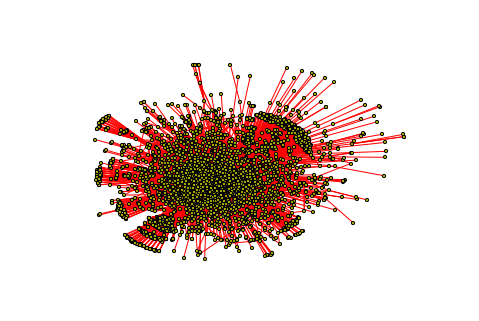

In [268]:
nx.draw(ghonim, pos=pos_ghonim, node_color='y',
        node_size=10,
        edge_color='r')

In [269]:
pos_justin = nx.spring_layout(justin)

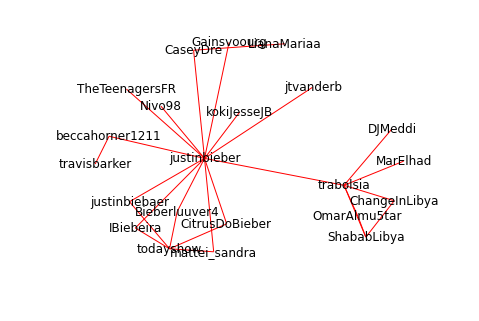

In [272]:
nx.draw(justin, pos=pos_justin, 
        node_size=0,
        with_labels=True,
        edge_color='r', )

In [273]:
nx.average_clustering(ghonim) #cluster coefficient 

0.04332254475699303

# Triad

In [298]:
import csv
edgelist = csv.reader(open('9_11_edgelist.txt'))
g = nx.Graph()
for frm, to, weight, conf in edgelist:
    g.add_edge(frm, to, weight=weight, conf=conf)

In [312]:
for n in g.nodes_iter():
    g.node[n]['flight'] = 'None'

In [313]:
attrb = csv.reader(open('9_11_attrib.txt'))
for name, attr in attrb:
    g.node[name]['flight'] = attr

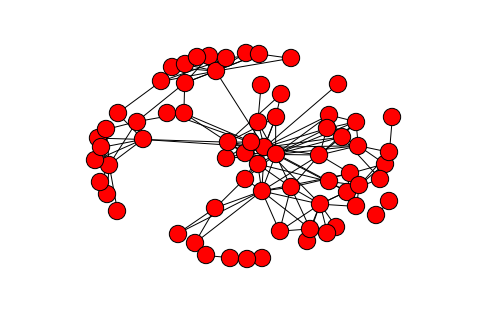

In [314]:
nx.draw(g)

In [331]:
component = nx.connected_component_subgraphs(g)


In [333]:
cc = next(component)

In [334]:
from collections import defaultdict

In [338]:
def plot_multimode(m, layout=nx.spring_layout,
                   type_string='type',
                   filename_prefix='',
                   output_type='pdf'):
    colors = ['r', 'g', 'b', 'c', 'm','y','k']
    colormap = {}
    d = nx.degree(m)
    pos = layout(m)
    nodesets = defaultdict(list)
    for n in m.nodes_iter():
        t = m.node[n][type_string]
        nodesets[t].append(n)
    print("drawing nodes..")
    i = 0
    for key in nodesets.keys():
        ns = [d[n]*100 for n in nodesets[key]]
        nx.draw_networkx_nodes(m, pos, 
                               nodelist=nodesets[key],node_size=ns)
        colormap[key] = colors[i]
        i += 1
        if i == len(colors):
            i = 0
    print("drawing edges...")
    nx.draw_networkx_edges(m, pos, width=0.5,alpha=0.5)
    nx.draw_networkx_labels(m, pos, font_size=8)
    plt.axis('off')
    if filename_prefix is not '':
        plt.savefig(filename_prefix+'.'+output_type)


        

In [341]:
import multimode as mm

drawing nodes...
{'11_WTC North': 'g', '93_Penn': 'm', 'None': 'b', '175_WTC South': 'c', '77_Pentagon': 'r'}
drawing edges...
drawing labels...


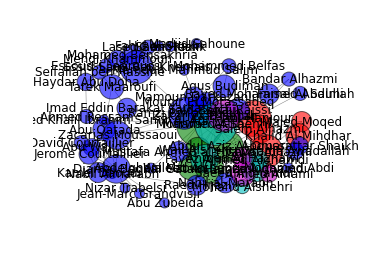

In [343]:
mm.plot_multimode(cc, type_string='flight',filename_prefix='example')

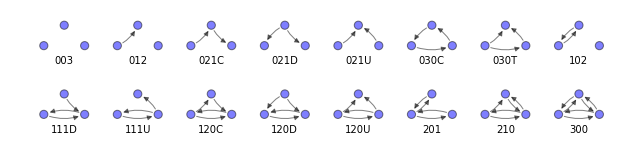

In [344]:
import triadic
import draw_triads

In [345]:
kite = nx.DiGraph(nx.krackhardt_kite_graph())

In [350]:
k_census, k_node_census = triadic.triadic_census(kite)
k_census

{'003': 22.0,
 '012': 0,
 '021C': 0,
 '021D': 0,
 '021U': 0,
 '030C': 0,
 '030T': 0,
 '102': 63,
 '111D': 0,
 '111U': 0,
 '120C': 0,
 '120D': 0,
 '120U': 0,
 '201': 24,
 '210': 0,
 '300': 11}

In [346]:
census, node_census = triadic.triadic_census(g)

In [347]:
census

{'003': 42716.0,
 '012': 0,
 '021C': 0,
 '021D': 0,
 '021U': 0,
 '030C': 0,
 '030T': 0,
 '102': 8837,
 '111D': 0,
 '111U': 0,
 '120C': 0,
 '120D': 0,
 '120U': 0,
 '201': 707,
 '210': 0,
 '300': 134}

In [348]:
node_census

{'Abdelghani Mzoudi': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 0,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 0,
  '210': 0,
  '300': 0},
 'Abdul Aziz Al-Omari': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 278,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 14,
  '210': 0,
  '300': 5},
 'Abdussattar Shaikh': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 184,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 8,
  '210': 0,
  '300': 3},
 'Abu Qatada': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0,
  '102': 235,
  '111D': 0,
  '111U': 0,
  '120C': 0,
  '120D': 0,
  '120U': 0,
  '201': 18,
  '210': 0,
  '300': 2},
 'Abu Walid': {'003': 0,
  '012': 0,
  '021C': 0,
  '021D': 0,
  '021U': 0,
  '030C': 0,
  '030T': 0

In [360]:
keys = list(k_node_census.values())[1].keys()

In [362]:
values = [v for v in 
          [k_node_census[k].values()
           for k in k_node_census.keys()]]

In [367]:
pd.DataFrame(values, columns=sorted(keys))

,003,012,021C,021D,021U,030C,030T,102,111D,111U,120C,120D,120U,201,210,300
0,0,0,0,0,0,0,0,0,4,8,0,0,0,14,0,0
1,0,0,0,0,0,0,0,0,3,4,0,0,0,11,0,0
2,0,0,0,0,0,0,0,0,1,4,0,0,0,7,0,0
3,0,0,0,0,0,0,0,0,2,3,0,0,0,7,0,0
4,0,0,0,0,0,0,0,0,0,2,0,0,0,4,0,0
5,0,0,0,0,0,0,0,0,1,1,0,0,0,5,0,0
6,0,0,0,0,0,0,0,0,0,1,0,0,0,3,0,0
7,0,0,0,0,0,0,0,0,0,1,0,0,0,5,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,7,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [368]:
g_values = [v for v in 
          [node_census[k].values()
           for k in node_census.keys()]]

In [369]:
pd.DataFrame(g_values, columns=sorted(keys))

,003,012,021C,021D,021U,030C,030T,102,111D,111U,120C,120D,120U,201,210,300
0,0,0,0,0,0,0,0,0,10,42,0,0,0,273,0,0
1,0,0,0,0,0,0,0,0,1,11,0,0,0,121,0,0
2,0,0,0,0,0,0,0,0,0,10,0,0,0,123,0,0
3,0,0,0,0,0,0,0,0,36,226,0,0,0,912,0,0
4,0,0,0,0,0,0,0,0,6,20,0,0,0,234,0,0
5,0,0,0,0,0,0,0,0,1,11,0,0,0,119,0,0
6,0,0,0,0,0,0,0,0,1,2,0,0,0,195,0,0
7,0,0,0,0,0,0,0,0,0,0,0,0,0,67,0,0
8,0,0,0,0,0,0,0,0,0,7,0,0,0,57,0,0
9,0,0,0,0,0,0,0,0,3,8,0,0,0,184,0,0


In [371]:
census, node_census = triadic.triadic_census(cc)

In [376]:
pd.DataFrame([[k,v]for k,v in 
 sorted([ (node_census[k]['300'],k) for k in node_census.keys()], reverse=True)])

,0,1
0,36,Mohamed Atta
1,12,Fayez Ahmed
2,10,Zakariya Essabar
3,9,Hani Hanjour
4,8,Ziad Jarrah
5,7,Waleed Alshehri
6,6,Majed Moqed
7,5,Saeed Alghamdi
8,4,Satam Suqami
9,4,Said Bahaji


In [377]:
eco = nx.read_pajek('economic.net')

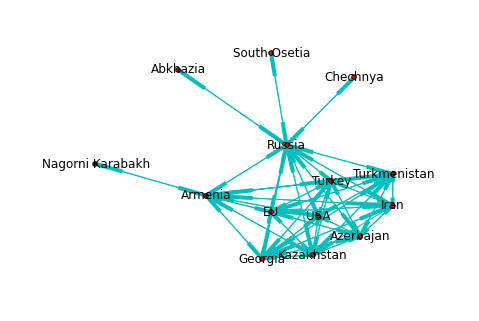

In [388]:
nx.draw(eco, node_size=20, edge_color='c', with_labels=1)

In [391]:
eco.edges(data=1)[:5]

[('Armenia', 'Georgia', {'weight': 0.25}),
 ('Armenia', 'Nagorni Karabakh', {'weight': 1.0}),
 ('Armenia', 'Turkey', {'weight': 0.25}),
 ('Armenia', 'USA', {'weight': 0.25}),
 ('Armenia', 'EU', {'weight': 0.75})]

In [395]:
e2 = trim_edges(eco, weight=0.5)

In [398]:
cliques = list(nx.find_cliques(e2))
cliques

[['EU', 'Armenia'],
 ['EU', 'Georgia'],
 ['EU', 'Russia', 'Kazakhstan'],
 ['EU', 'Russia', 'Turkey'],
 ['EU', 'Azerbajan'],
 ['EU', 'USA', 'Kazakhstan'],
 ['EU', 'USA', 'Turkey'],
 ['Nagorni Karabakh', 'Armenia'],
 ['South Osetia', 'Russia'],
 ['Abkhazia', 'Russia'],
 ['Chechnya', 'Russia']]